In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [170]:
#Read data
data = pd.read_excel('/Users/dr/Documents/GitHub/KMeans and KNN/-Stock-classification-with-K-means-and-KNN-1/RTY as of Oct 25 20241_rrmkcreo.xlsx', engine='openpyxl')

In [171]:
data.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,--,--,23.480,1.219984,2754470912,29.274418,35.469791,354.21405,--,51.98077,--,--,183.01,--,33.822326
1,AXNX UW Equity,Axonics Inc,--,--,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,--,25.707512,--,--,175.53,--,109.80486
2,WGS UW Equity,GeneDx Holdings Corp,--,--,60.250,--,703855680,1.196106,0.803663,--,--,--,--,--,148.00,--,--
3,ULCC UW Equity,Frontier Group Holdings Inc,--,--,6.985,--,1106645376,2.805808,0.402562,8.841541,--,--,--,54.347534,126.26,--,15.980725
4,RELY UW Equity,Remitly Global Inc,--,--,14.640,2.77041,3659426304,--,--,--,--,--,--,--,98.00,--,59.219034


In [172]:
data.columns

Index(['Ticker', 'Name', 'Weight', 'Shares', 'Price', 'BEst PEG Ratio:Y\n',
       'Market Cap LF\n', 'P/B 5Yr Avg LF\n', 'P/S 5Yr Avg LF\n',
       'Rev Gr Adj 5Y CAGR LF\n', 'P/CF 5Yr Avg LF\n', 'BV - 5 Yr Geo Gr LF\n',
       'CF/Sh - 5 Yr Geo Gr LF\n', 'Basic EPS - 5 Year Average Growth LF\n',
       'BEst Est LTG EPS\n', 'Dvd Ind Yld\n', 'BEst P/E BF12M\n'],
      dtype='object')

In [173]:
data.shape

(1972, 17)

In [174]:
data_copy = data.copy()

data_filled = data_copy.fillna(0)

In [175]:
data_filled.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,--,--,23.480,1.219984,2754470912,29.274418,35.469791,354.21405,--,51.98077,--,--,183.01,--,33.822326
1,AXNX UW Equity,Axonics Inc,--,--,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,--,25.707512,--,--,175.53,--,109.80486
2,WGS UW Equity,GeneDx Holdings Corp,--,--,60.250,--,703855680,1.196106,0.803663,--,--,--,--,--,148.00,--,--
3,ULCC UW Equity,Frontier Group Holdings Inc,--,--,6.985,--,1106645376,2.805808,0.402562,8.841541,--,--,--,54.347534,126.26,--,15.980725
4,RELY UW Equity,Remitly Global Inc,--,--,14.640,2.77041,3659426304,--,--,--,--,--,--,--,98.00,--,59.219034


In [176]:
#Replace the string '--' with float 0
data_replaced = data.replace('--', 0)

numeric_columns = data_replaced.columns.drop(['Ticker', 'Name'])

data_replaced[numeric_columns] = data_replaced[numeric_columns].apply(pd.to_numeric, errors='coerce')
data_replaced[numeric_columns] = data_replaced[numeric_columns].fillna(0)


/var/folders/p2/s867_82x1zb758ysgxvlj2yw0000gn/T/ipykernel_2839/2982064571.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_replaced = data.replace('--', 0)


In [177]:
data_replaced.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,0,0,23.480,1.219984,2754470912,29.274418,35.469791,354.214050,0.0,51.980770,0.0,0.000000,183.01,0.0,33.822326
1,AXNX UW Equity,Axonics Inc,0,0,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,0.0,25.707512,0.0,0.000000,175.53,0.0,109.804860
2,WGS UW Equity,GeneDx Holdings Corp,0,0,60.250,0.000000,703855680,1.196106,0.803663,0.000000,0.0,0.000000,0.0,0.000000,148.00,0.0,0.000000
3,ULCC UW Equity,Frontier Group Holdings Inc,0,0,6.985,0.000000,1106645376,2.805808,0.402562,8.841541,0.0,0.000000,0.0,54.347534,126.26,0.0,15.980725
4,RELY UW Equity,Remitly Global Inc,0,0,14.640,2.770410,3659426304,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,98.00,0.0,59.219034


In [178]:
X = data_replaced[['Market Cap LF\n', 'BEst PEG Ratio:Y\n']]

In [179]:
X.head()

,Market Cap LF\n,BEst PEG Ratio:Y\n
0,2754470912,1.219984
1,3429709056,3.109805
2,703855680,0.000000
3,1106645376,0.000000
4,3659426304,2.770410


In [180]:
#Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [181]:
X_scaled

array([[ 0.7212989 ,  0.0470597 ],
       [ 1.12046062,  0.23614398],
       [-0.49090618, -0.07500461],
       ...,
       [ 0.23410198, -0.07500461],
       [-0.50960209, -0.07500461],
       [ 0.83131255, -0.07500461]])

In [182]:
#K-means Clustering
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [183]:
data_replaced['Cluster'] = clusters

In [184]:
data_replaced.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Cluster
0,TGTX UR Equity,TG Therapeutics Inc,0,0,23.480,1.219984,2754470912,29.274418,35.469791,354.214050,0.0,51.980770,0.0,0.000000,183.01,0.0,33.822326,0
1,AXNX UW Equity,Axonics Inc,0,0,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,0.0,25.707512,0.0,0.000000,175.53,0.0,109.804860,3
2,WGS UW Equity,GeneDx Holdings Corp,0,0,60.250,0.000000,703855680,1.196106,0.803663,0.000000,0.0,0.000000,0.0,0.000000,148.00,0.0,0.000000,1
3,ULCC UW Equity,Frontier Group Holdings Inc,0,0,6.985,0.000000,1106645376,2.805808,0.402562,8.841541,0.0,0.000000,0.0,54.347534,126.26,0.0,15.980725,1
4,RELY UW Equity,Remitly Global Inc,0,0,14.640,2.770410,3659426304,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,98.00,0.0,59.219034,3


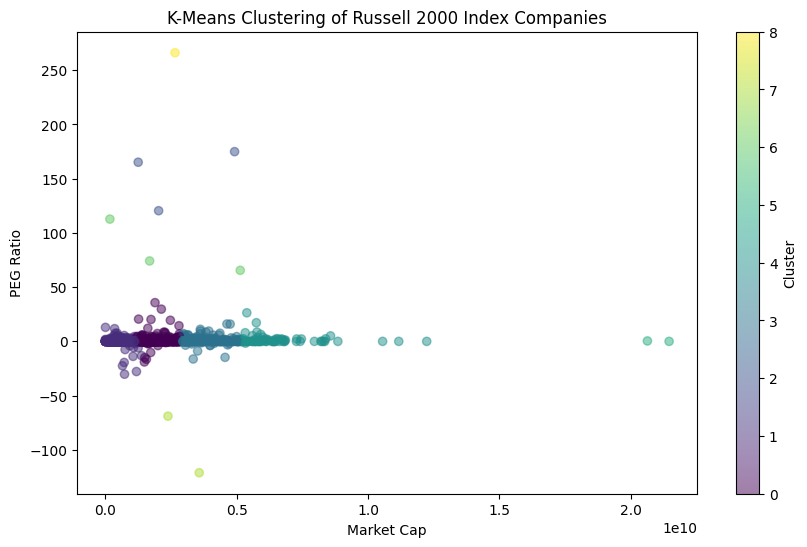

In [185]:
#Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(data_replaced['Market Cap LF\n'], data_replaced['BEst PEG Ratio:Y\n'], c=data_replaced['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Market Cap')
plt.ylabel('PEG Ratio')
plt.title('K-Means Clustering of Russell 2000 Index Companies')
plt.colorbar(label='Cluster')
plt.show()


In [186]:
#MorngingStar Style Box

data_replaced['Value Score'] = (
                                data_replaced['BEst P/E BF12M\n'] * 0.50 + 
                                data_replaced['P/B 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['P/S 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['P/CF 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['Dvd Ind Yld\n'] * 0.125
                                )

data_replaced['Growth Score'] = (data_replaced['BEst Est LTG EPS\n'] * 0.50 + 
                                 data_replaced['Basic EPS - 5 Year Average Growth LF\n'] * 0.125 + 
                                 data_replaced['Rev Gr Adj 5Y CAGR LF\n'] * 0.125 +
                                 data_replaced['CF/Sh - 5 Yr Geo Gr LF\n'] * 0.125 +
                                 data_replaced['BV - 5 Yr Geo Gr LF\n'] * 0.125
                                 )

In [187]:
data_replaced.describe()

,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Cluster,Value Score,Growth Score
count,1972.0,1972.0,1972.000000,1972.000000,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,0.0,0.0,34.325246,0.749641,1.534292e+09,2.928205,31.468539,7.155601,12.322079,3.466989,3.579709,8.593756,4.405968,1.456018,23.368156,1.138438,17.705933,5.052491
std,0.0,0.0,48.733793,9.997133,1.692070e+09,8.491667,559.875392,28.483424,108.679202,18.321476,17.332916,150.165345,14.515570,5.355001,163.756791,1.100990,108.349049,21.083144
min,0.0,0.0,0.115500,-121.067371,0.000000e+00,0.000000,0.000000,-100.000000,0.000000,-100.000000,-100.000000,-2017.131592,-117.420000,0.000000,0.000000,0.000000,0.000000,-253.026367
25%,0.0,0.0,7.995000,0.000000,3.751970e+08,0.807126,0.411841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.992731,0.000000
50%,0.0,0.0,18.305000,0.000000,9.127113e+08,1.471820,1.317870,0.000000,4.729654,0.000000,0.000000,0.000000,0.000000,0.000000,10.386718,1.000000,7.087482,2.079524
75%,0.0,0.0,40.077500,0.000000,2.136014e+09,2.829447,2.735392,8.806523,10.944803,8.094413,1.552898,4.280231,0.000000,2.036136,18.423157,1.000000,12.215099,8.020268
max,0.0,0.0,778.280000,266.081895,2.145804e+10,265.950867,23254.423828,427.076691,4598.741699,334.566162,215.143387,4677.399902,183.010000,212.201599,4966.027842,8.000000,2907.168647,586.708903


In [188]:
#Determine Style 
def determine_style(row):
    score_diff = row['Growth Score'] - row['Value Score']
    if score_diff > threshold:
        return 'Growth'
    elif score_diff < -threshold:
        return 'Value'
    else:
        return 'Blend'

In [189]:
threshold = 4
data_replaced['Style'] = data_replaced.apply(determine_style, axis=1)

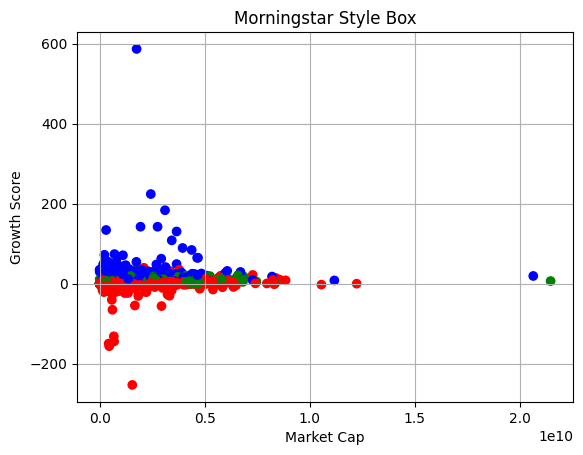

In [190]:
fig, ax = plt.subplots()
colors = {'Value':'red', 'Growth':'blue', 'Blend':'green'}
ax.scatter(data_replaced['Market Cap LF\n'], data_replaced['Growth Score'], 
           c=data_replaced['Style'].apply(lambda x: colors[x]))

plt.xlabel('Market Cap')
plt.ylabel('Growth Score')
plt.title('Morningstar Style Box')
plt.grid(True)
plt.show()

In [191]:
#Classify Size
def classify_size(market_cap):
    if market_cap > large_cap_threshold:
        return 'Large'
    elif market_cap > mid_cap_threshold:
        return 'Mid'
    else:
        return 'Small'

In [192]:
large_cap_threshold = 10e09
mid_cap_threshold = 1.5e09

data_replaced['Size'] = data_replaced['Market Cap LF\n'].apply(classify_size)

In [193]:
#Select companies to compare cluster positioning with that of Morningstar rating
selected_companies = data_replaced.iloc[[0, 1, 2, 3, 4]]

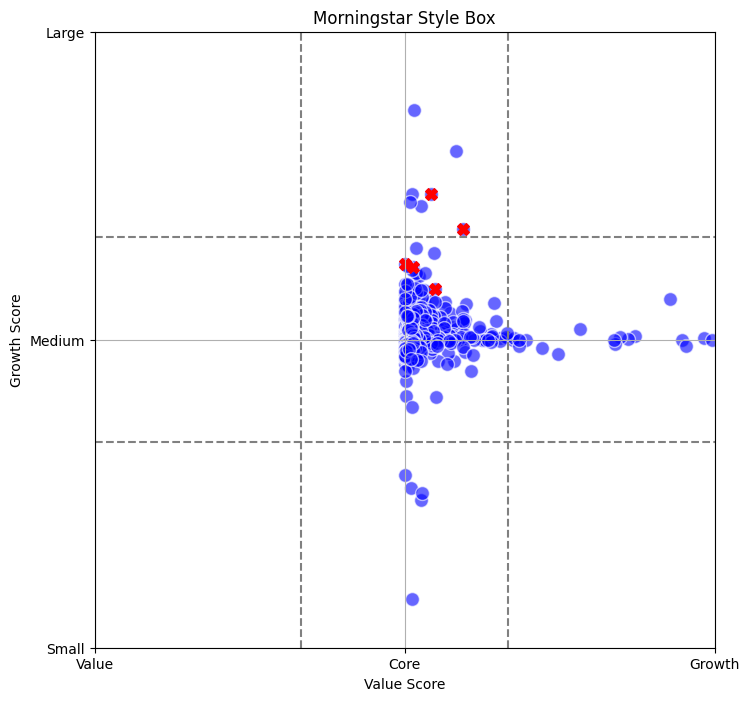

In [194]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data_replaced['Value Score'], data_replaced['Growth Score'], c='blue', alpha=0.6, edgecolors='w', s=100)

ax.scatter(selected_companies['Value Score'], selected_companies['Growth Score'], c='red', marker='X', s=70)

ax.set_xticks([-300, 0, 300])
ax.set_xticklabels(['Value', 'Core', 'Growth'])
ax.set_yticks([-300, 0, 300])
ax.set_yticklabels(['Small', 'Medium', 'Large'])


plt.xlabel('Value Score')
plt.ylabel('Growth Score')
plt.title('Morningstar Style Box')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.axvline(x=-100, color='grey', linestyle='--')
plt.axvline(x=100, color='grey', linestyle='--')
plt.axhline(y=-100, color='grey', linestyle='--')
plt.axhline(y=100, color='grey', linestyle='--')
plt.grid(True)
plt.show()

In [195]:
#KNN
X_train = X_scaled
y_train = data_replaced['Cluster']

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [196]:
new_stock = [[2.5e9, 15]] #Market Cap = $2.5 billion and PEG 15

new_stock_scaled = scaler.fit_transform(new_stock)

In [197]:
predicted_cluster = knn.predict(new_stock_scaled)

print(f'The new stock belongs to the cluster: {predicted_cluster[0]}')

The new stock belongs to the cluster: 0
